In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
# from scipy.stats import zscore
# from scipy.stats.mstats import winsorize
from scipy import stats

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

usedu = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

I find it hard to analyze the spending and expenditure between states with this data because it's so spread. We wouldn't expect smaller states like Rhode Island or Connecticut to spend what larger states like California and Texas are able to, so I find the to be unhelpful. If we were looking at total revenues/expenditures per capita, we'd be able to make comparisons. Similarly, the enroll and grade columns (students enrolled in each grade) is difficult utilizze because it doesn't tell us anything about the learning environments. Perhaps a metric such as students per classroom would be more useful.

What I do find interesting is the variance between the average math and reading scores. The variance of the reading scores is nearly half that of the math scores - this indicates to me that many more children are having a difficult time with math and scoring lower on the tests. With this data, I'd like to explore how to increase the competency in this subject.

In [24]:
usedu.sort_values(by=['STATE', 'YEAR'])
usedu.at[0, 'ENROLL'] = 730004.0
usedu.at[0, 'AVG_READING_8_SCORE'] = 260.276441
usedu.drop(usedu[usedu['YEAR'] == 2016].index, inplace=True)
usedu.drop(usedu[usedu['YEAR'] == 2017].index, inplace=True)
usedu.interpolate(method ='linear', limit=None,inplace=True, limit_direction='both', limit_area=None, downcast=None)

pd.set_option('float_format', '{:f}'.format)
print(usedu.columns)
print(usedu.describe())
mass.head(10)

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')
             YEAR         ENROLL   TOTAL_REVENUE  FEDERAL_REVENUE  \
count 1390.000000    1390.000000     1390.000000      1390.000000   
mean  2003.548201  801431.562950  8113248.435252    681309.238849   
std      6.869569 1015445.609509 10988947.711037   1084472.337937   
min   1992.000000   43866.000000   465650.000000     31020.000000   
25%   1998.000000  145582.250000  1962874.000000    126277.750000   
50%   2004.000000  503121.000000  4167354.000000    3391

2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

There is a slight decrease from 1995 to 1996 in total revenue and the expenditure shows the expected affects the year after. The federal and state revenue increased during this year, but the local revenue dropped quite significantly, and this tells me that whatever the cause was, it only affected the state. When I did some research on real estate taxes in Massachusetts in 1995, I can see there's a distinct decrease starting in 1992 that doesn't reverse until 1995 which would account for the drop in local revenue.
There is another drop in 2002 to 2003 in total expenditure, though revenue wasn't affected in the same way that year or in the previous year, so I'm not sure what would account for this.
The most obvious is the dip from 2009 to 2010 - I would think this drop was because of the housing burst that threw the world into a recession.

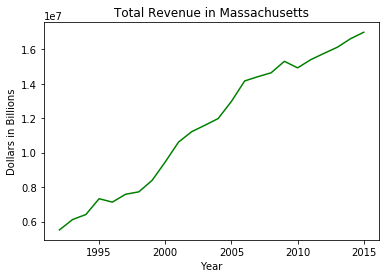

Text(0, 0.5, 'Dollars in Billions')

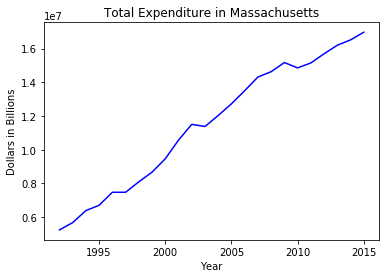

In [4]:
mass = usedu.loc[usedu['STATE'] == 'MASSACHUSETTS']

plt.plot(mass['YEAR'],mass['TOTAL_REVENUE'], color='green')
plt.title('Total Revenue in Massachusetts')
plt.xlabel('Year')
plt.ylabel('Dollars in Billions')
plt.show()
plt.plot(mass['YEAR'],mass['TOTAL_EXPENDITURE'], color='blue')
plt.title('Total Expenditure in Massachusetts')
plt.xlabel('Year')
plt.ylabel('Dollars in Billions')

3. In your chosen state, which of the lessons are the students more successful, math or reading?

The average math scores for grades four and eight are greater than the average reading scores for both grades. However, the standard deviations for the reading scores are lower, so I'm going to run t-tests to see if these differences are significant.

The p-values for the difference between the math and reading scores are well below the standard 0.05, which indicates that there is a meaningful difference in the means. Assuming the tests have the same potential maximum, I would confidently say that math lessons are more successful in Massachusetts.

In [5]:
math_4_scores = mass['AVG_MATH_4_SCORE']
math_8_scores = mass['AVG_MATH_8_SCORE']
reading_4_scores = mass['AVG_READING_4_SCORE']
reading_8_scores = mass['AVG_READING_8_SCORE']

math_t_val = stats.ttest_ind(math_4_scores, reading_4_scores)
reading_t_val = stats.ttest_ind(math_8_scores, reading_8_scores)

print("T-Test Stats for Math Scores: ", math_t_val)
print("T-Test Stats for Reading Scores: ", reading_t_val)

T-Test Stats for Math Scores:  Ttest_indResult(statistic=3.8693112088686963, pvalue=0.00034212023317675407)
T-Test Stats for Reading Scores:  Ttest_indResult(statistic=6.495874306048185, pvalue=5.211621836240421e-08)


4. What are the distributions of the math and reading scores in the sample?

The distributions are sort of all over the place - the distributions of the reading scores look relatively normal, but I'm worried I'm not capturing all the scores. The average math scores for grade 8 appears to be skewed to the right and the distribution of the grade 4 math scores  is more of a multimodal distribution.

(array([1., 0., 1., 3., 1., 7., 1., 4., 4., 2.]),
 array([249.6897555 , 251.79678832, 253.90382114, 256.01085395,
        258.11788677, 260.22491959, 262.33195241, 264.43898523,
        266.54601805, 268.65305087, 270.76008369]),
 <a list of 10 Patch objects>)

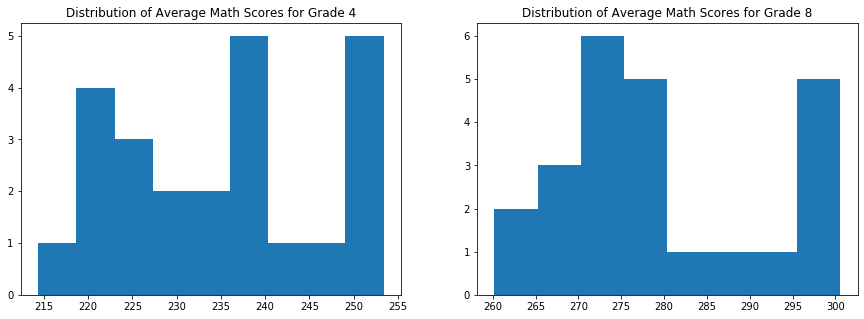

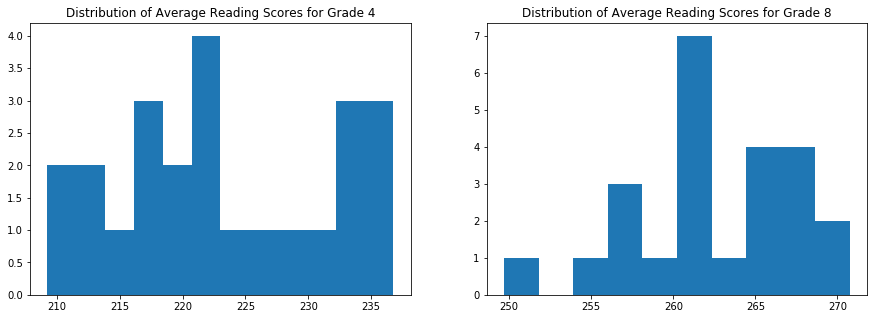

In [23]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Distribution of Average Math Scores for Grade 4')
plt.hist(x=mass['AVG_MATH_4_SCORE'], bins=9)
plt.subplot(1,2,2)
plt.title('Distribution of Average Math Scores for Grade 8')
plt.hist(x=mass['AVG_MATH_8_SCORE'], bins=8)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Distribution of Average Reading Scores for Grade 4')
plt.hist(x=mass['AVG_READING_4_SCORE'], bins=12)
plt.subplot(1,2,2)
plt.title('Distribution of Average Reading Scores for Grade 8')
plt.hist(x=mass['AVG_READING_8_SCORE'], bins=10)

5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

As expected, the distributions of the scores when filled with the mean and medians are very similar. The modes of the graphs of the values filled by the median are slightly higher, indicating we have more outliers on the low end. The distribution of the scores when missing values are filled using linear interpolation more closesly resemble the original distribution graphs I created. This makes sense, as I had used linear interpolation on the original dataset to fill these empty cells. I would think this last distribution is the most accurate as there's more variety in the scores - it's hard to believe nearly two thirds of the scores for each grade and subject would be exactly the same.

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  0., 16.,  3.,  4.]),
 array([249.6897555 , 251.6041763 , 253.51859711, 255.43301792,
        257.34743873, 259.26185953, 261.17628034, 263.09070115,
        265.00512195, 266.91954276, 268.83396357]),
 <a list of 10 Patch objects>)

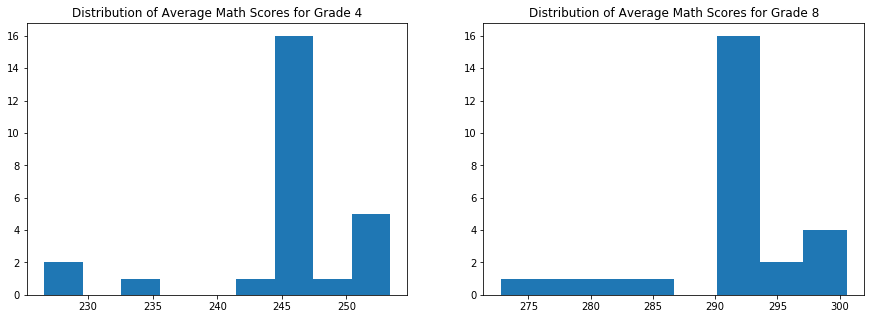

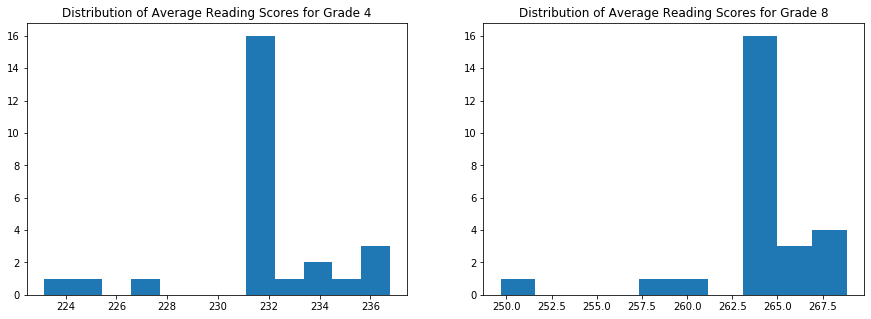

In [32]:
# Distributions using mean

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
usedu = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

mass = usedu.loc[usedu['STATE'] =='MASSACHUSETTS']
mass_mean_filled = mass.fillna(mass.mean())
mass_mean_filled

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Distribution of Average Math Scores for Grade 4 Using Mean')
plt.hist(x=mass_mean_filled['AVG_MATH_4_SCORE'], bins=9)
plt.subplot(1,2,2)
plt.title('Distribution of Average Math Scores for Grade 8 Using Mean')
plt.hist(x=mass_mean_filled['AVG_MATH_8_SCORE'], bins=8)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Distribution of Average Reading Scores for Grade 4 Using Mean')
plt.hist(x=mass_mean_filled['AVG_READING_4_SCORE'], bins=12)
plt.subplot(1,2,2)
plt.title('Distribution of Average Reading Scores for Grade 8 Using Mean')
plt.hist(x=mass_mean_filled['AVG_READING_8_SCORE'], bins=10)


      PRIMARY_KEY  STATE   YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
21          False  False  False    True          False            False   
73          False  False  False   False          False            False   
126         False  False  False   False          False            False   
178         False  False  False   False          False            False   
230         False  False  False   False          False            False   
281         False  False  False   False          False            False   
333         False  False  False   False          False            False   
385         False  False  False   False          False            False   
437         False  False  False   False          False            False   
490         False  False  False   False          False            False   
541         False  False  False   False          False            False   
594         False  False  False   False          False            False   
645         False  False 

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  0., 19.,  4.]),
 array([249.6897555 , 251.6041763 , 253.51859711, 255.43301792,
        257.34743873, 259.26185953, 261.17628034, 263.09070115,
        265.00512195, 266.91954276, 268.83396357]),
 <a list of 10 Patch objects>)

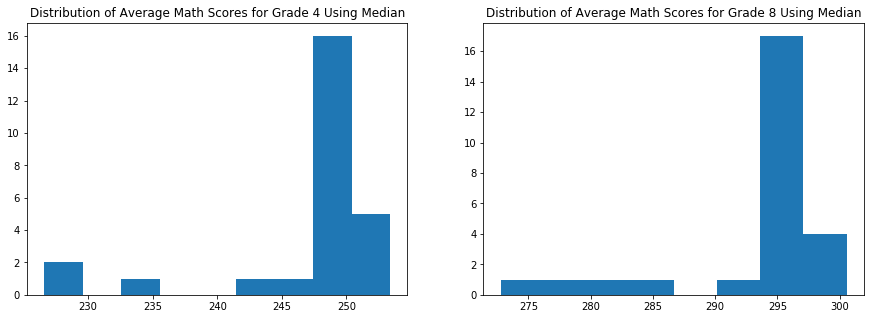

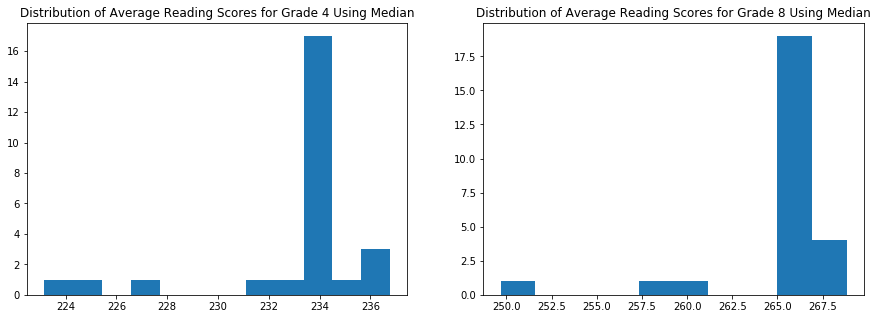

In [47]:
# Distributions using median

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
usedu = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

mass = usedu.loc[usedu['STATE'] =='MASSACHUSETTS']
mass_median_filled = mass.fillna(mass.median())
mass_median_filled
print(mass.isnull())
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Distribution of Average Math Scores for Grade 4 Using Median')
plt.hist(x=mass_median_filled['AVG_MATH_4_SCORE'], bins=9)
plt.subplot(1,2,2)
plt.title('Distribution of Average Math Scores for Grade 8 Using Median')
plt.hist(x=mass_median_filled['AVG_MATH_8_SCORE'], bins=8)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Distribution of Average Reading Scores for Grade 4 Using Median')
plt.hist(x=mass_median_filled['AVG_READING_4_SCORE'], bins=12)
plt.subplot(1,2,2)
plt.title('Distribution of Average Reading Scores for Grade 8 Using Median')
plt.hist(x=mass_median_filled['AVG_READING_8_SCORE'], bins=10)

(array([5., 0., 1., 0., 2., 1., 2., 3., 5., 7.]),
 array([249.6897555 , 251.6041763 , 253.51859711, 255.43301792,
        257.34743873, 259.26185953, 261.17628034, 263.09070115,
        265.00512195, 266.91954276, 268.83396357]),
 <a list of 10 Patch objects>)

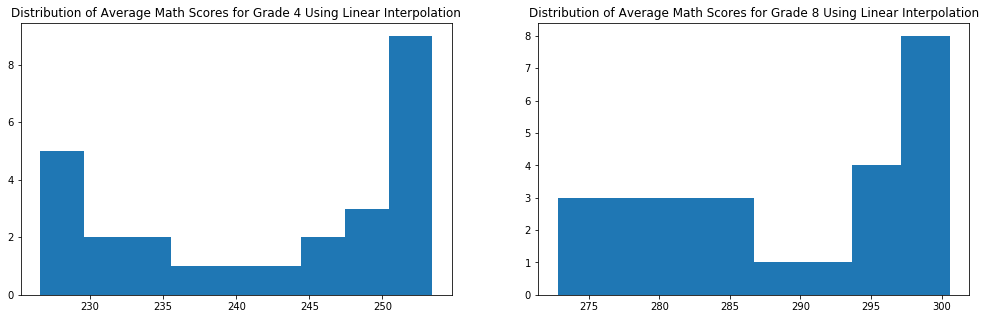

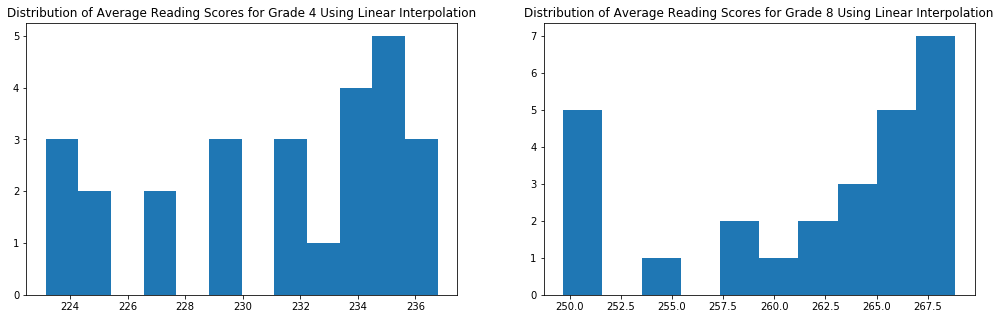

In [46]:
# Distributions using linear interpolation

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
usedu = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

mass_linear_interpolation = usedu.loc[usedu['STATE'] =='MASSACHUSETTS']
mass_linear_interpolation.interpolate(method ='linear', limit=None,inplace=True, limit_direction='both', limit_area=None, downcast=None)
mass_linear_interpolation

plt.figure(figsize = (17,5))

plt.subplot(1,2,1)
plt.title('Distribution of Average Math Scores for Grade 4 Using Linear Interpolation')
plt.hist(x=mass_linear_interpolation['AVG_MATH_4_SCORE'], bins=9)
plt.subplot(1,2,2)
plt.title('Distribution of Average Math Scores for Grade 8 Using Linear Interpolation')
plt.hist(x=mass_linear_interpolation['AVG_MATH_8_SCORE'], bins=8)

plt.figure(figsize = (17,5))
plt.subplot(1,2,1)
plt.title('Distribution of Average Reading Scores for Grade 4 Using Linear Interpolation')
plt.hist(x=mass_linear_interpolation['AVG_READING_4_SCORE'], bins=12)
plt.subplot(1,2,2)
plt.title('Distribution of Average Reading Scores for Grade 8 Using Linear Interpolation')
plt.hist(x=mass_linear_interpolation['AVG_READING_8_SCORE'], bins=10)